<a href="https://colab.research.google.com/github/IswariAfala/tugas-fisika/blob/main/radioactive_decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

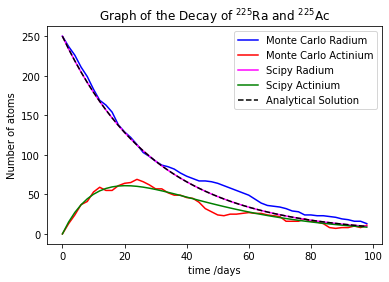

In [2]:
from __future__ import division
import numpy
import matplotlib.pyplot as pyplot
import scipy.integrate
import random


t_half_rad   = 20.8 #initial conditions
t_half_act   = 10.0
N0           = 250
t1           = 100
n_timepoints = 50

def analytic(N0, timebase):
    '''Analytic solution for the radium count'''
    return N0 * numpy.exp (-timebase /t_half_rad * numpy.log(2))

def simulate_monte_carlo(N0, t1, n_timepoints):
    '''Monte carlo simulation for both radium and actinium counts'''
    dt             = t1 / n_timepoints #Calculating the interval between each time division
    count_radium   = numpy.zeros((n_timepoints)) #creating zero arrays to put the counts into
    count_actinium = numpy.zeros((n_timepoints))
    atoms          = numpy.ones((N0)) #Creating an array of numbers to represent the atoms in the simulation
    p_decay_rad    = 1 - numpy.exp(-dt / t_half_rad * numpy.log(2)) #Calculating the decay probabilities in the time interval
    p_decay_act    = 1 - numpy.exp(-dt / t_half_act * numpy.log(2))
    for idx_time in range(n_timepoints):

        count_radium[idx_time]   = (atoms == 1).sum() #Counting how many atoms of each type remain in the interval
        count_actinium[idx_time] = (atoms == 2).sum()

        for idx_atom in range(N0):

            if atoms[idx_atom] == 1: #Deciding whether the given atom should decay
                if random.random() <= p_decay_rad:
                    atoms[idx_atom] = 2
                else:
                    atoms[idx_atom] = 1
            elif atoms[idx_atom] == 2:
                if random.random() <= p_decay_act:
                    atoms[idx_atom] = 3
                else:
                    atoms[idx_atom] = 2

    return count_radium, count_actinium

timebase = numpy.arange(0, t1, t1/n_timepoints) #creating the array of times for use in the analytic solution and scipy
n_analytic = analytic(N0,  timebase) #Calling the analytic solution
n_rad, n_act = simulate_monte_carlo(N0, t1, n_timepoints) #Calling the Monte Carlo Simulation   

def f(N, t):
    '''Differential for the decay, for use with scipy.integrate.odeint'''
    N_rad, N_act = N #unpacking N
    tau_rad = t_half_rad / numpy.log(2)
    tau_act = t_half_act / numpy.log(2)
    DEQ_rad = - N_rad / tau_rad
    DEQ_act = - N_act / tau_act + N_rad / tau_rad

    return numpy.array((DEQ_rad, DEQ_act)) #repacking

N0_rad = 250 #Initial conditions for scipy
N0_act = 0
N0 = numpy.array((N0_rad, N0_act))
n_scipy = scipy.integrate.odeint(f, N0, timebase) #Calling scipy odeint

pyplot.figure() #Plotting code
pyplot.plot(timebase, n_rad, label = 'Monte Carlo Radium', color = 'blue')
pyplot.plot(timebase, n_act, label = 'Monte Carlo Actinium', color = 'red')
pyplot.plot(timebase, n_scipy[:,0], label = 'Scipy Radium', color = 'magenta')
pyplot.plot(timebase, n_scipy[:,1], label = 'Scipy Actinium', color = 'green')
pyplot.plot(timebase, n_analytic, label = 'Analytical Solution', color = 'black', linestyle = '--')
pyplot.title('Graph of the Decay of $^{225}$Ra and $^{225}$Ac')
pyplot.ylabel('Number of atoms')
pyplot.xlabel('time /days')
pyplot.legend(loc='upper right') 
pyplot.show()